


Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

•Data
•Variable Definition
•User_ID User ID
•Product_ID Product ID
•Gender Sex of User
•Age Age in bins
•Occupation Occupation (Masked)
•City_Category Category of the City (A,B,C)
•Stay_In_Current_City_Years Number of years stay in current city
•Marital_Status Marital Status
•Product_Category_1 Product Category (Masked)
•Product_Category_2 Product may belongs to other category also (Masked)
•Product_Category_3 Product may belongs to other category also (Masked)
•Purchase Purchase Amount (Target Variable)


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [4]:
df1=pd.read_csv("blackFriday_train.csv")
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df2=pd.read_csv("blackFriday_test.csv")
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [6]:
#appending tarain and test data
df=df1.append(df2,sort=False)

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
# separating numerical features and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features


['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [9]:
df[numerical_features]

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370.0
1,1000001,10,0,1,6.0,14.0,15200.0
2,1000001,10,0,12,NaN,NaN,1422.0
3,1000001,10,0,12,14.0,NaN,1057.0
4,1000002,16,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...
233594,1006036,15,1,8,NaN,NaN,NaN
233595,1006036,15,1,5,8.0,NaN,NaN
233596,1006036,15,1,1,5.0,12.0,NaN
233597,1006037,1,0,10,16.0,NaN,NaN


In [10]:
#finding out nan values
Nan_values=[feature for feature in numerical_features if df[feature].isnull().sum()>1]
for feature in Nan_values:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')



Product_Category_2 0.3139  % missing values
Product_Category_3 0.6965  % missing values
Purchase 0.2981  % missing values


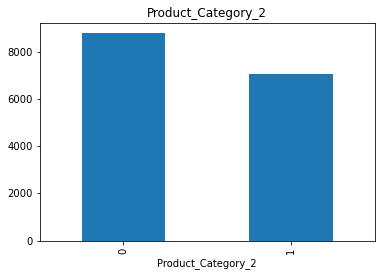

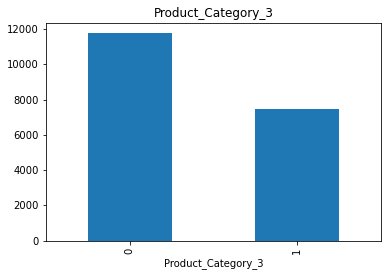

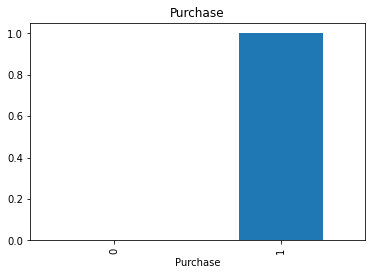

In [11]:
#finding out relationship between missing values and purchase
for feature in Nan_values:
    data=df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['Purchase'].median().plot.bar()
    plt.title(feature)
    plt.show()

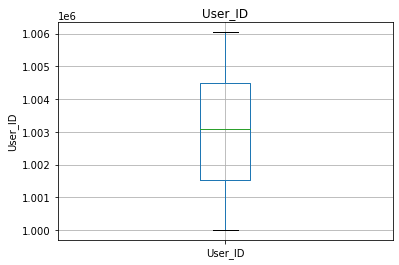

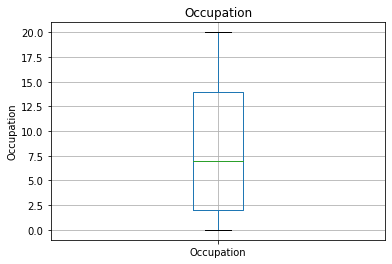

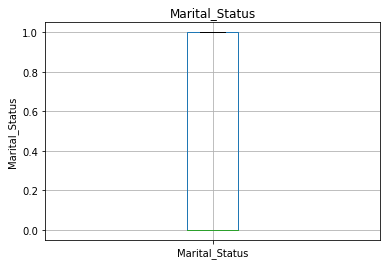

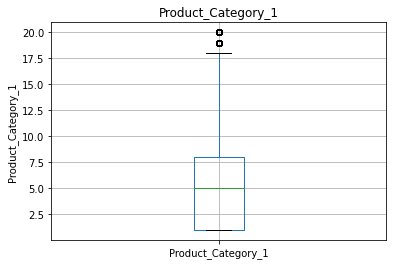

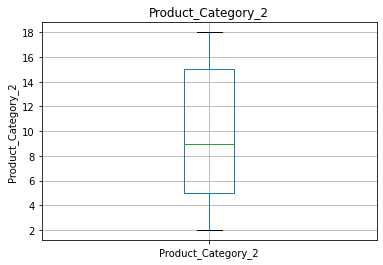

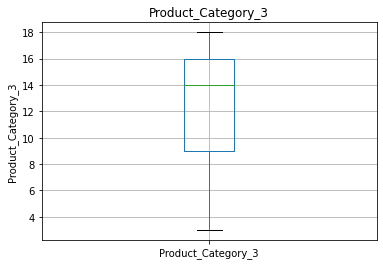

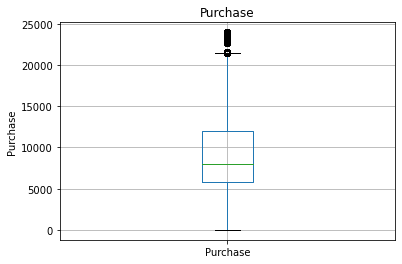

In [12]:
#outliers for numerical features
for feature in numerical_features:
    data=df[numerical_features].copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [13]:
    ## create a new feature to capture nan values
    
    for feature in numerical_features:
        median_value=data[feature].median()
        data[feature+'nan']=np.where(data[feature].isnull(),1,0)
        data[feature].fillna(median_value,inplace=True)
        
    
        

In [14]:
data[numerical_features].isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

In [15]:
data.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_IDnan,Occupationnan,Marital_Statusnan,Product_Category_1nan,Product_Category_2nan,Product_Category_3nan,Purchasenan
0,1000001,10,0,3,9.0,14.0,8370.0,0,0,0,0,1,1,0
1,1000001,10,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0
2,1000001,10,0,12,9.0,14.0,1422.0,0,0,0,0,1,1,0
3,1000001,10,0,12,14.0,14.0,1057.0,0,0,0,0,0,1,0
4,1000002,16,0,8,9.0,14.0,7969.0,0,0,0,0,1,1,0


In [16]:
# separating categorical features 
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [17]:
df[categorical_features]

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
233594,P00118942,F,26-35,B,4+
233595,P00254642,F,26-35,B,4+
233596,P00031842,F,26-35,B,4+
233597,P00124742,F,46-50,C,4+


In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,df[feature].unique()))


The feature is Product_ID and number of categories are ['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842']
The feature is Gender and number of categories are ['F' 'M']
The feature is Age and number of categories are ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
The feature is City_Category and number of categories are ['A' 'C' 'B']
The feature is Stay_In_Current_City_Years and number of categories are ['2' '4+' '3' '1' '0']


In [19]:
#dropping unnecessary data from categorical features
categorical_features1=df[categorical_features].drop('Product_ID',axis=1)
categorical_features1

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+
...,...,...,...,...
233594,F,26-35,B,4+
233595,F,26-35,B,4+
233596,F,26-35,B,4+
233597,F,46-50,C,4+


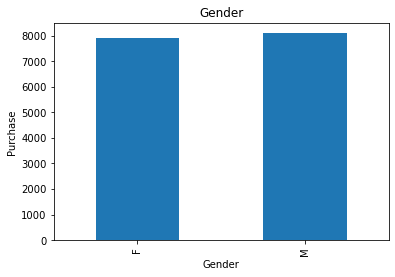

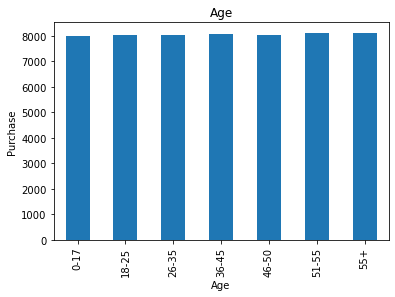

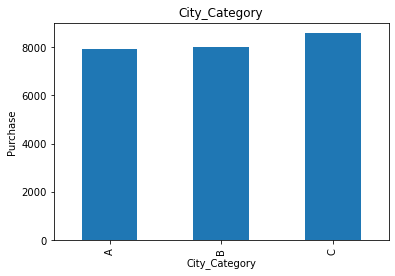

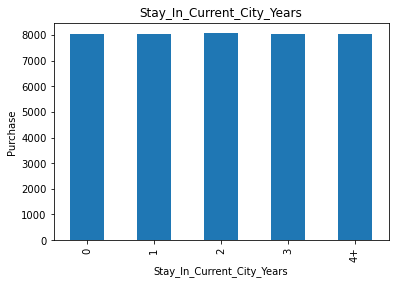

In [20]:
#Find out the relationship between categorical variable and dependent feature purchase
for feature in categorical_features1:
    data=df.copy()
    data.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title(feature)
    plt.show()


In [21]:
categorical_features1

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+
...,...,...,...,...
233594,F,26-35,B,4+
233595,F,26-35,B,4+
233596,F,26-35,B,4+
233597,F,46-50,C,4+


In [22]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [23]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
233594    F
233595    F
233596    F
233597    F
233598    F
Name: Gender, Length: 783667, dtype: object

feature engineering

In [24]:
#converting categorical into numerical(feature engineering)
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [25]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [26]:
#age
df['Age']=df['Age'].map({'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6 ,'18-25':7})

In [27]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,4,1,C,4+,0,10,16.0,NaN,NaN


In [28]:
#city category
city=pd.get_dummies(df['City_Category'],drop_first = True)

In [29]:
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [30]:
df=pd.concat([df,city],axis=1)

In [31]:
df.drop('City_Category',axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,2,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,1006036,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,1006037,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [32]:
#Stay_In_Current_City_Years(Replacing the value using string method)

df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','')

In [33]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,2,16,C,4,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4,1,8,NaN,NaN,NaN,1,0
233595,1006036,P00254642,0,3,15,B,4,1,5,8.0,NaN,NaN,1,0
233596,1006036,P00031842,0,3,15,B,4,1,1,5.0,12.0,NaN,1,0
233597,1006037,P00124742,0,4,1,C,4,0,10,16.0,NaN,NaN,0,1


In [34]:
for feature in numerical_features:
        median_value=df[feature].median()
        df[feature].fillna(median_value,inplace=True)

In [35]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,9.0,14.0,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,9.0,14.0,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,14.0,1057.0,0,0
4,1000002,P00285442,1,2,16,C,4,0,8,9.0,14.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4,1,8,9.0,14.0,8047.0,1,0
233595,1006036,P00254642,0,3,15,B,4,1,5,8.0,14.0,8047.0,1,0
233596,1006036,P00031842,0,3,15,B,4,1,1,5.0,12.0,8047.0,1,0
233597,1006037,P00124742,0,4,1,C,4,0,10,16.0,14.0,8047.0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
 12  B                           783667 non-null  uint8  
 13  C             

In [37]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
 12  B                           783667 non-null  int32  
 13  C             

In [39]:
df.drop('Product_ID',inplace=True,axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    783667 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

In [41]:
df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,0,1,10,A,2,0,3,9.0,14.0,8370.0,0,0
1,1000001,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,0,1,10,A,2,0,12,9.0,14.0,1422.0,0,0
3,1000001,0,1,10,A,2,0,12,14.0,14.0,1057.0,0,0
4,1000002,1,2,16,C,4,0,8,9.0,14.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,0,3,15,B,4,1,8,9.0,14.0,8047.0,1,0
233595,1006036,0,3,15,B,4,1,5,8.0,14.0,8047.0,1,0
233596,1006036,0,3,15,B,4,1,1,5.0,12.0,8047.0,1,0
233597,1006037,0,4,1,C,4,0,10,16.0,14.0,8047.0,0,1


In [42]:
df.drop('User_ID',axis=1,inplace=True)

In [43]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,9.0,14.0,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,9.0,14.0,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,14.0,1057.0,0,0
4,1,2,16,C,4,0,8,9.0,14.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,B,4,1,8,9.0,14.0,8047.0,1,0
233595,0,3,15,B,4,1,5,8.0,14.0,8047.0,1,0
233596,0,3,15,B,4,1,1,5.0,12.0,8047.0,1,0
233597,0,4,1,C,4,0,10,16.0,14.0,8047.0,0,1


In [44]:
df=df[['Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','B','C','Purchase']]

In [45]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,Purchase
0,0,1,10,2,0,3,9.0,14.0,0,0,8370.0
1,0,1,10,2,0,1,6.0,14.0,0,0,15200.0
2,0,1,10,2,0,12,9.0,14.0,0,0,1422.0
3,0,1,10,2,0,12,14.0,14.0,0,0,1057.0
4,1,2,16,4,0,8,9.0,14.0,0,1,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,9.0,14.0,1,0,8047.0
233595,0,3,15,4,1,5,8.0,14.0,1,0,8047.0
233596,0,3,15,4,1,1,5.0,12.0,1,0,8047.0
233597,0,4,1,4,0,10,16.0,14.0,0,1,8047.0


# visualizing the independent features on dependent features

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

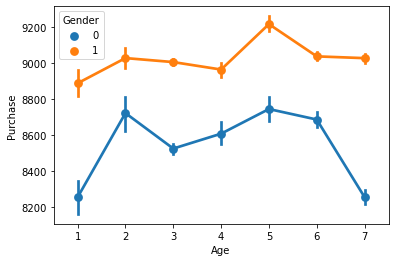

In [65]:
sns.pointplot(x='Age',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

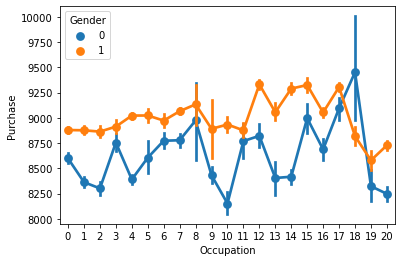

In [66]:
sns.pointplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

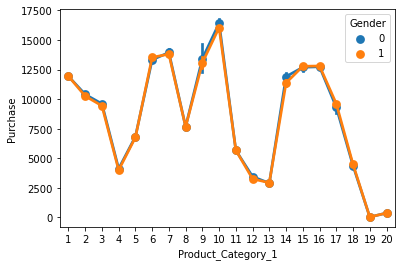

In [67]:
sns.pointplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

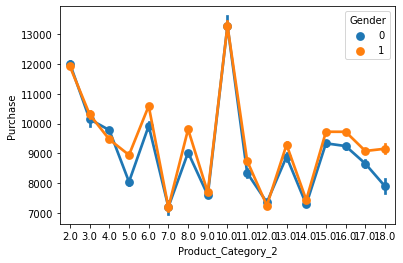

In [68]:
sns.pointplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

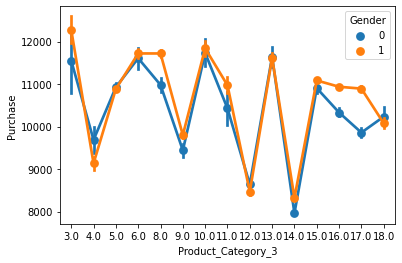

In [69]:
sns.pointplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

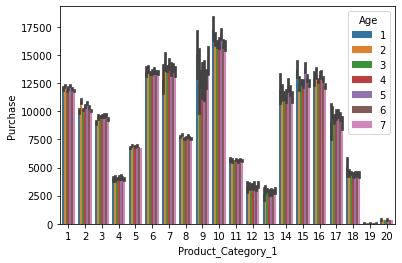

In [74]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Age',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

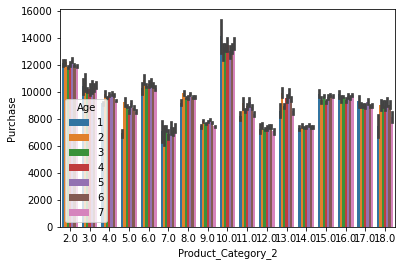

In [77]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Age',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

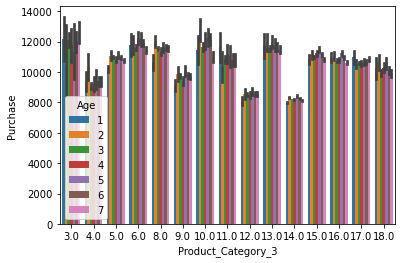

In [78]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Age',data=df)

# conclusion

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing between the productcategory 1 and 2 but a large variations can be seen for category 3 based on age.It illustrates that product category 3 has been purchased by all age categories ac compared to  product category2 and product category1.It can be said that most of the products are purchased by male as compared to female and high purchasing is observed for product category 3. 

In [46]:
x=df.iloc[:,0:10]

In [47]:
x

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,9.0,14.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,9.0,14.0,0,0
3,0,1,10,2,0,12,14.0,14.0,0,0
4,1,2,16,4,0,8,9.0,14.0,0,1
...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,9.0,14.0,1,0
233595,0,3,15,4,1,5,8.0,14.0,1,0
233596,0,3,15,4,1,1,5.0,12.0,1,0
233597,0,4,1,4,0,10,16.0,14.0,0,1


In [48]:
y=df.iloc[:,10]

In [49]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594     8047.0
233595     8047.0
233596     8047.0
233597     8047.0
233598     8047.0
Name: Purchase, Length: 783667, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [62]:
x_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
1446,0,2,3,1,1,11,16.0,14.0,1,0
139259,0,3,0,4,0,11,16.0,14.0,0,1
348624,0,7,4,1,0,8,9.0,14.0,1,0
88450,1,3,17,1,0,15,9.0,14.0,1,0
145118,1,7,17,1,0,1,8.0,17.0,1,0
...,...,...,...,...,...,...,...,...,...,...
359783,1,3,7,4,0,6,10.0,13.0,1,0
152315,1,4,7,1,1,8,9.0,14.0,0,1
117952,0,4,15,1,1,5,9.0,14.0,0,1
435829,1,7,4,0,1,2,4.0,14.0,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit(x_test)

In [79]:
X_train=pd.DataFrame(x_train)

In [80]:
X_test=pd.DataFrame(x_test)

Random forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [84]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
y_pred=rf.predict(x_test)

In [88]:
rf.score(X_train,y_train)

0.6355702449196483

In [89]:
rf.score(X_test,y_test)

0.38755345724252976

linear regression

In [93]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [94]:
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=lr.predict(x_test)

In [97]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))






0.08781155463213497
0.08822340728574729


XGBOOST

In [99]:
!pip install xgboost

In [100]:
import xgboost as xgb

In [102]:
xgb_reg=xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [103]:
xgb_reg.fit(X_train,y_train)

[12:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { objectvie } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objectvie='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [104]:
y_pred = xgb_reg.predict(X_test)

In [106]:
from sklearn import metrics

10121929.440791762
49.10384032578331
0.4401396699323068
0.44076189721548265


C:\Users\sys\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


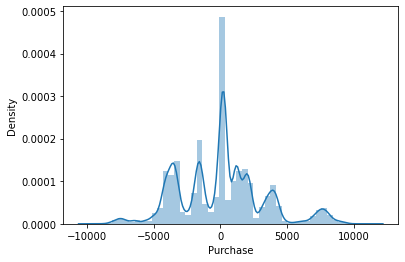

In [108]:
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print(xgb_reg.score(X_train,y_train))
print(xgb_reg.score(X_test,y_test))
sns.distplot(y_test-y_pred)
plt.show()
